
# Project: Investigating the No Show rate and what factors are affecting it
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import mpld3
mpld3.enable_notebook()


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ModuleNotFoundError: ignored

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()
#   types and look for instances of missing or possibly errant data.


PatientId  AppointmentID Gender  ... Handcap SMS_received  No-show
0  2.987250e+13        5642903      F  ...       0            0       No
1  5.589978e+14        5642503      M  ...       0            0       No
2  4.262962e+12        5642549      F  ...       0            0       No
3  8.679512e+11        5642828      F  ...       0            0       No
4  8.841186e+12        5642494      F  ...       0            0       No

[5 rows x 14 columns]

In [3]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.head()

PatientId  AppointmentID Gender  ... Handcap SMS_received  No-show
0  2.987250e+13        5642903      F  ...       0            0       No
1  5.589978e+14        5642503      M  ...       0            0       No
2  4.262962e+12        5642549      F  ...       0            0       No
3  8.679512e+11        5642828      F  ...       0            0       No
4  8.841186e+12        5642494      F  ...       0            0       No

[5 rows x 14 columns]

There Are no missing values in the dataset.

In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
#Handcap had multiple unique values so just checking what they are.
df.Handcap.unique()

array([0, 1, 2, 3, 4])

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(110527, 14)

In [0]:
#Renaming the column so that the fomatting remains the same throughout and its easier to remember 
df = df.rename({'SMS_received': 'SMSReceived', 'No-show': 'NoShow','PatientId':'PatientID'}, axis=1)  # new method


In [11]:
df

PatientID  AppointmentID Gender  ... Handcap SMSReceived  NoShow
0       2.987250e+13        5642903      F  ...       0           0      No
1       5.589978e+14        5642503      M  ...       0           0      No
2       4.262962e+12        5642549      F  ...       0           0      No
3       8.679512e+11        5642828      F  ...       0           0      No
4       8.841186e+12        5642494      F  ...       0           0      No
...              ...            ...    ...  ...     ...         ...     ...
110522  2.572134e+12        5651768      F  ...       0           1      No
110523  3.596266e+12        5650093      F  ...       0           1      No
110524  1.557663e+13        5630692      F  ...       0           1      No
110525  9.213493e+13        5630323      F  ...       0           1      No
110526  3.775115e+14        5629448      F  ...       0           1      No

[110527 rows x 14 columns]


### Data Cleaning 
### Not Required since data is complete 


In [0]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [13]:
df.describe()

PatientID  AppointmentID  ...        Handcap    SMSReceived
count  1.105270e+05   1.105270e+05  ...  110527.000000  110527.000000
mean   1.474963e+14   5.675305e+06  ...       0.022248       0.321026
std    2.560949e+14   7.129575e+04  ...       0.161543       0.466873
min    3.921784e+04   5.030230e+06  ...       0.000000       0.000000
25%    4.172614e+12   5.640286e+06  ...       0.000000       0.000000
50%    3.173184e+13   5.680573e+06  ...       0.000000       0.000000
75%    9.439172e+13   5.725524e+06  ...       0.000000       1.000000
max    9.999816e+14   5.790484e+06  ...       4.000000       1.000000

[8 rows x 9 columns]

There is are few outliers in Age as there are negative values or age being more than 100. Although possible in rare cases but over here its better to remove them

In [14]:
df[df['Age']<0]

PatientID  AppointmentID Gender  ... Handcap SMSReceived  NoShow
99832  4.659432e+14        5775010      F  ...       0           0      No

[1 rows x 14 columns]

In [15]:
df[df['Age']>100]

PatientID  AppointmentID Gender  ... Handcap SMSReceived  NoShow
58014  9.762948e+14        5651757      F  ...       0           0      No
63912  3.196321e+13        5700278      F  ...       1           0     Yes
63915  3.196321e+13        5700279      F  ...       1           0     Yes
68127  3.196321e+13        5562812      F  ...       1           0     Yes
76284  3.196321e+13        5744037      F  ...       1           0      No
90372  2.342836e+11        5751563      F  ...       0           0      No
97666  7.482346e+14        5717451      F  ...       0           1      No

[7 rows x 14 columns]

In [16]:
df.shape

(110527, 14)

In [0]:
df.drop(df[df.Age < 0 ].index, inplace=True)
df.drop(df[df.Age > 100 ].index, inplace=True)


In [18]:
df.shape

(110519, 14)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1
### Does the neighbourhood reflect the no show rate or not.

In [19]:
ShowRate = df.groupby('NoShow').count()['AppointmentID']
ShowRate

NoShow
No     88203
Yes    22316
Name: AppointmentID, dtype: int64

In [20]:
df2 = df.groupby([ 'NoShow','Neighbourhood']).count()['AppointmentID']
df2

NoShow  Neighbourhood      
No      AEROPORTO                 7
        ANDORINHAS             1740
        ANTÔNIO HONÓRIO         221
        ARIOVALDO FAVALESSA     220
        BARRO VERMELHO          332
                               ... 
Yes     SÃO JOSÉ                428
        SÃO PEDRO               515
        TABUAZEIRO              573
        UNIVERSITÁRIO            32
        VILA RUBIM              141
Name: AppointmentID, Length: 160, dtype: int64

In [21]:

No_proportions = df2['No'] 
No_proportions['ILHAS OCEÂNICAS DE TRINDADE'] = 0
No_proportions = No_proportions.sort_index()

No_proportions

Neighbourhood
AEROPORTO                 7
ANDORINHAS             1740
ANTÔNIO HONÓRIO         221
ARIOVALDO FAVALESSA     220
BARRO VERMELHO          332
                       ... 
SÃO JOSÉ               1548
SÃO PEDRO              1933
TABUAZEIRO             2559
UNIVERSITÁRIO           120
VILA RUBIM              710
Name: AppointmentID, Length: 81, dtype: int64

In [22]:

Yes_proportions = df2['Yes'] 
Yes_proportions['PARQUE INDUSTRIAL'] = 0
Yes_proportions = Yes_proportions.sort_index()
Yes_proportions

Neighbourhood
AEROPORTO                1
ANDORINHAS             518
ANTÔNIO HONÓRIO         50
ARIOVALDO FAVALESSA     62
BARRO VERMELHO          91
                      ... 
SÃO JOSÉ               428
SÃO PEDRO              515
TABUAZEIRO             573
UNIVERSITÁRIO           32
VILA RUBIM             141
Name: AppointmentID, Length: 81, dtype: int64

In [0]:
ind = np.arange(len(Yes_proportions))  
width = 0.35       

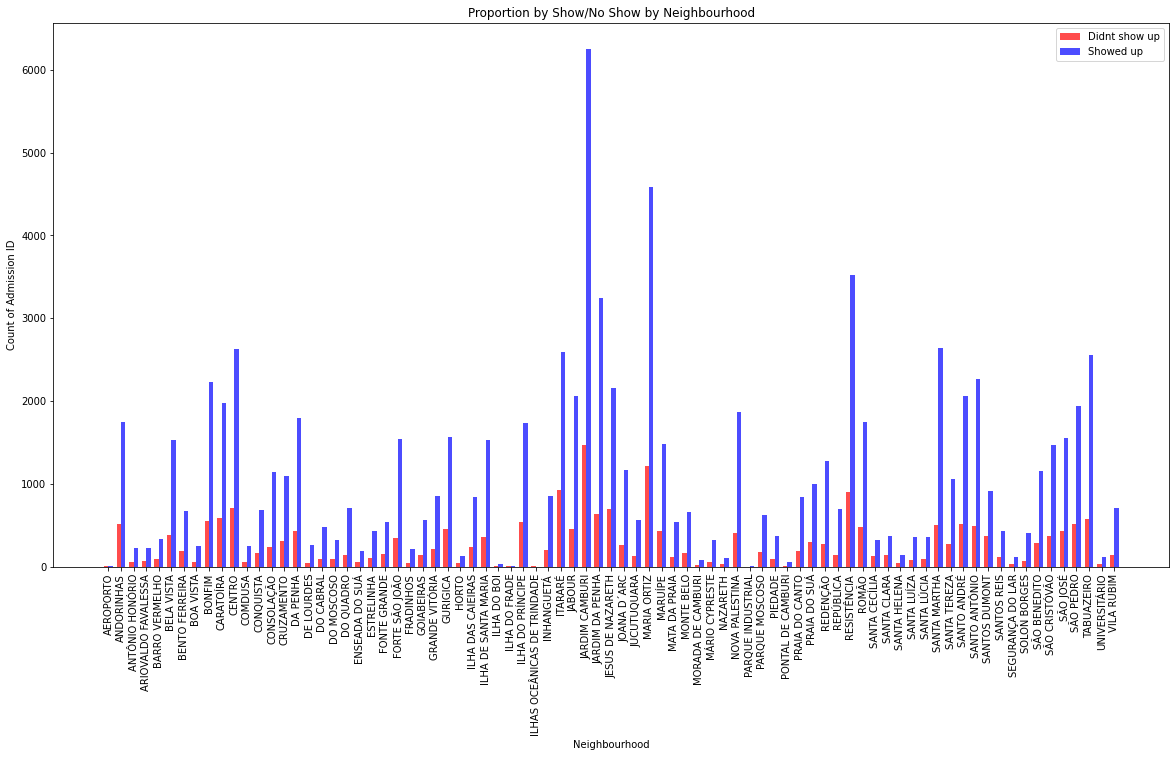

In [43]:
#the Plot is very cumbersome since there are multiple neighbourhoods. So I enabled the zooming plugin of matplotlib using mpld3 
# plot bars
plt.figure(figsize=(20,10))
red_bars = plt.bar(ind, Yes_proportions, width, color='r', alpha=.7, label='Didnt show up')
blue_bars = plt.bar(ind + width, No_proportions, width, color='b', alpha=.7, label='Showed up')

# title and labels

x= plt.ylabel('Count of Admission ID')
y= plt.xlabel('Neighbourhood')
plt.title('Proportion by Show/No Show by Neighbourhood')
locations = ind + width / 2  # xtick locations
labels =  sorted(df.Neighbourhood.unique()) # xtick labels
plt.xticks(locations, labels,rotation='vertical')

# legend
plt.legend();

The graph is makes it clear that there are most cases of show rates in most regions but its not clear that by how much so there is a need to see it in the basis of percentage of show and no  show to see a proper ratio

In [44]:
# Created a new column with 1 so that i can apply summation and then use lambda function to calculate percentage. 
# As i was unable to create percentage based on count so i had to use a work around
df['num'] = 1
dfUngroup = df.groupby(['Neighbourhood', 'NoShow']).agg({'num': 'sum'})
dfUngroup = dfUngroup.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).reset_index()

dfUngroup


Neighbourhood NoShow        num
0          AEROPORTO     No  87.500000
1          AEROPORTO    Yes  12.500000
2         ANDORINHAS     No  77.059345
3         ANDORINHAS    Yes  22.940655
4    ANTÔNIO HONÓRIO     No  81.549815
..               ...    ...        ...
155       TABUAZEIRO    Yes  18.295019
156    UNIVERSITÁRIO     No  78.947368
157    UNIVERSITÁRIO    Yes  21.052632
158       VILA RUBIM     No  83.431257
159       VILA RUBIM    Yes  16.568743

[160 rows x 3 columns]

In [45]:
df1 = dfUngroup.groupby(['NoShow','Neighbourhood']).min()['num']
df1

NoShow  Neighbourhood      
No      AEROPORTO              87.500000
        ANDORINHAS             77.059345
        ANTÔNIO HONÓRIO        81.549815
        ARIOVALDO FAVALESSA    78.014184
        BARRO VERMELHO         78.486998
                                 ...    
Yes     SÃO JOSÉ               21.659919
        SÃO PEDRO              21.037582
        TABUAZEIRO             18.295019
        UNIVERSITÁRIO          21.052632
        VILA RUBIM             16.568743
Name: num, Length: 160, dtype: float64

In [46]:
No_percentage = df1['No'] 
No_percentage['ILHAS OCEÂNICAS DE TRINDADE'] = 0
No_percentage = No_percentage.sort_index()
No_percentage


Neighbourhood
AEROPORTO              87.500000
ANDORINHAS             77.059345
ANTÔNIO HONÓRIO        81.549815
ARIOVALDO FAVALESSA    78.014184
BARRO VERMELHO         78.486998
                         ...    
SÃO JOSÉ               78.340081
SÃO PEDRO              78.962418
TABUAZEIRO             81.704981
UNIVERSITÁRIO          78.947368
VILA RUBIM             83.431257
Name: num, Length: 81, dtype: float64

In [47]:
Yes_percentage = df1['Yes'] 
Yes_percentage['PARQUE INDUSTRIAL'] = 0
Yes_percentage = Yes_percentage.sort_index()
Yes_percentage

Neighbourhood
AEROPORTO              12.500000
ANDORINHAS             22.940655
ANTÔNIO HONÓRIO        18.450185
ARIOVALDO FAVALESSA    21.985816
BARRO VERMELHO         21.513002
                         ...    
SÃO JOSÉ               21.659919
SÃO PEDRO              21.037582
TABUAZEIRO             18.295019
UNIVERSITÁRIO          21.052632
VILA RUBIM             16.568743
Name: num, Length: 81, dtype: float64

In [0]:
ind = np.arange(len(Yes_percentage))  
width = 0.35  

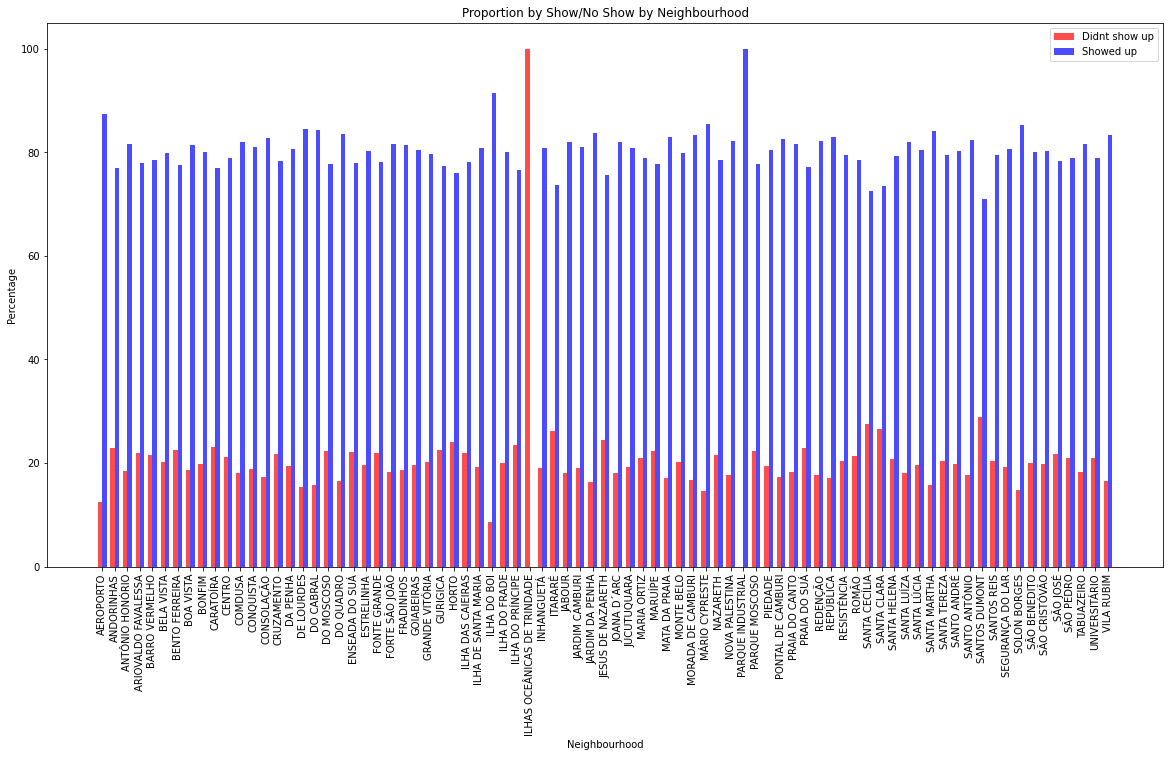

In [49]:
#With the Percentage it is bit clear that Most of the values are below 30 % for no show rate.
# plot bars
plt.figure(figsize=(20,10))
red_bars = plt.bar(ind, Yes_percentage, width, color='r', alpha=.7, label='Didnt show up')
blue_bars = plt.bar(ind + width, No_percentage, width, color='b', alpha=.7, label='Showed up')

# title and labels

x= plt.ylabel('Percentage')
y= plt.xlabel('Neighbourhood')
plt.title('Proportion by Show/No Show by Neighbourhood')
locations = ind + width / 2  # xtick locations
labels =  sorted(df.Neighbourhood.unique()) # xtick labels
plt.xticks(locations, labels,rotation='vertical')

# legend
plt.legend();

With this it is bit clear that majority of the neighbourhood have less than 20% of no show rate and 1 place have 100% no show rate. But there can be a scenario where the number of cases are very few that the percentage gets shot up easily. So for that there is a need to pull numbers of top 10 neighbourhood and see the number of Admissions there.

In [50]:
# Top 10 Neighbourhood where people have the highest no show rate.
dfUngroup[dfUngroup['NoShow'] == 'Yes'].nlargest(10,'num').loc[:,['Neighbourhood','num']]


Neighbourhood         num
68   ILHAS OCEÂNICAS DE TRINDADE  100.000000
139                SANTOS DUMONT   28.918495
121                SANTA CECÍLIA   27.455357
123                  SANTA CLARA   26.482213
72                       ITARARÉ   26.266363
80             JESUS DE NAZARETH   24.395373
57                         HORTO   24.000000
67              ILHA DO PRÍNCIPE   23.477493
19                     CARATOÍRA   23.040936
3                     ANDORINHAS   22.940655

In [51]:
# Top 10 Neighbourhood where people have the highest show rate.
dfUngroup[dfUngroup['NoShow'] == 'No'].nlargest(10,'num').loc[:,['Neighbourhood','num']]


Neighbourhood         num
101  PARQUE INDUSTRIAL  100.000000
62         ILHA DO BOI   91.428571
0            AEROPORTO   87.500000
95      MÁRIO CYPRESTE   85.444744
144       SOLON BORGES   85.287846
32          DE LOURDES   84.590164
34           DO CABRAL   84.285714
130       SANTA MARTHA   84.158416
77     JARDIM DA PENHA   83.724529
38           DO QUADRO   83.510012

In [52]:
# Need to check how many cases are present in top 3 Neighbourhood for both cases
Noshowlist = dfUngroup[dfUngroup['NoShow'] == 'Yes'].nlargest(10,'num')['Neighbourhood'].values.tolist()
Noshowlist


['ILHAS OCEÂNICAS DE TRINDADE',
 'SANTOS DUMONT',
 'SANTA CECÍLIA',
 'SANTA CLARA',
 'ITARARÉ',
 'JESUS DE NAZARETH',
 'HORTO',
 'ILHA DO PRÍNCIPE',
 'CARATOÍRA',
 'ANDORINHAS']

In [53]:
showlist = dfUngroup[dfUngroup['NoShow'] == 'No'].nlargest(10,'num')['Neighbourhood'].values.tolist()
showlist

['PARQUE INDUSTRIAL',
 'ILHA DO BOI',
 'AEROPORTO',
 'MÁRIO CYPRESTE',
 'SOLON BORGES',
 'DE LOURDES',
 'DO CABRAL',
 'SANTA MARTHA',
 'JARDIM DA PENHA',
 'DO QUADRO']

In [54]:
df[df['Neighbourhood'].isin(showlist)].groupby(['Neighbourhood','NoShow']).count()

PatientID  AppointmentID  ...  SMSReceived   num
Neighbourhood     NoShow                            ...                   
AEROPORTO         No              7              7  ...            7     7
                  Yes             1              1  ...            1     1
DE LOURDES        No            258            258  ...          258   258
                  Yes            47             47  ...           47    47
DO CABRAL         No            472            472  ...          472   472
                  Yes            88             88  ...           88    88
DO QUADRO         No            709            709  ...          709   709
                  Yes           140            140  ...          140   140
ILHA DO BOI       No             32             32  ...           32    32
                  Yes             3              3  ...            3     3
JARDIM DA PENHA   No           3246           3246  ...         3246  3246
                  Yes           631            631  ...          631   631
MÁRIO CYPRESTE    No            317            317  ...          317   317
                  Yes            54             54  ...           54    54
PARQUE INDUSTRIAL No              1              1  ...            1     1
SANTA MARTHA      No           2635           2635  ...         2635  2635
                  Yes           496            496  ...          496   496
SOLON BORGES      No            400            400  ...          400   400
                  Yes            69             69  ...           69    69

[19 rows x 13 columns]

In [55]:
df[df['Neighbourhood'].isin(Noshowlist)].groupby(['Neighbourhood','NoShow']).count()

PatientID  AppointmentID  ...  SMSReceived   num
Neighbourhood               NoShow                            ...                   
ANDORINHAS                  No           1740           1740  ...         1740  1740
                            Yes           518            518  ...          518   518
CARATOÍRA                   No           1974           1974  ...         1974  1974
                            Yes           591            591  ...          591   591
HORTO                       No            133            133  ...          133   133
                            Yes            42             42  ...           42    42
ILHA DO PRÍNCIPE            No           1734           1734  ...         1734  1734
                            Yes           532            532  ...          532   532
ILHAS OCEÂNICAS DE TRINDADE Yes             2              2  ...            2     2
ITARARÉ                     No           2591           2591  ...         2591  2591
                            Yes           923            923  ...          923   923
JESUS DE NAZARETH           No           2157           2157  ...         2157  2157
                            Yes           696            696  ...          696   696
SANTA CECÍLIA               No            325            325  ...          325   325
                            Yes           123            123  ...          123   123
SANTA CLARA                 No            372            372  ...          372   372
                            Yes           134            134  ...          134   134
SANTOS DUMONT               No            907            907  ...          907   907
                            Yes           369            369  ...          369   369

[19 rows x 13 columns]

Apart From PARQUE INDUSTRIAL and ILHAS OCEÂNICAS DE TRINDADE the other neighbourhood has enough sample to maintain the percentage integrity


### Research Question 2
### Finding out the which features have high correlation to No show rate

In [56]:
df.head()

PatientID  AppointmentID Gender  ... SMSReceived NoShow  num
0  2.987250e+13        5642903      F  ...           0     No    1
1  5.589978e+14        5642503      M  ...           0     No    1
2  4.262962e+12        5642549      F  ...           0     No    1
3  8.679512e+11        5642828      F  ...           0     No    1
4  8.841186e+12        5642494      F  ...           0     No    1

[5 rows x 15 columns]

In [57]:
#Converting No Show to int so that its easier to do comparison or plot correlation matrix
df1 = df.replace(['Yes','No', 'M','F'], [1,0,1,0])
#df['NoShow'] = (df['NoShow'] == 'Yes').astype(int64)
#Converting Gender to int so that its easier to do comparison or plot correlation matrix
#df['Gender'] = (df['Gender'] == 'M').astype(int64)
df1.head()

PatientID  AppointmentID  Gender  ... SMSReceived NoShow  num
0  2.987250e+13        5642903       0  ...           0      0    1
1  5.589978e+14        5642503       1  ...           0      0    1
2  4.262962e+12        5642549       0  ...           0      0    1
3  8.679512e+11        5642828       0  ...           0      0    1
4  8.841186e+12        5642494       0  ...           0      0    1

[5 rows x 15 columns]

The Data frame needs to go through some transformation so that its easier to find correlation between features and the No show 

In [58]:
df2 = df1.iloc[:,[2,5,7,8,9,10,11,12,13]]

df2.head()

Gender  Age  Scholarship  ...  Handcap  SMSReceived  NoShow
0       0   62            0  ...        0            0       0
1       1   56            0  ...        0            0       0
2       0   62            0  ...        0            0       0
3       0    8            0  ...        0            0       0
4       0   56            0  ...        0            0       0

[5 rows x 9 columns]

In [59]:
type(df2)

pandas.core.frame.DataFrame

In [60]:
# This show thats the highest correlationship between show and no show rate is weather the person received the SMS or not.

df2.corr()

Gender       Age  Scholarship  ...   Handcap  SMSReceived    NoShow
Gender        1.000000 -0.106340    -0.114313  ...  0.022987    -0.046322 -0.004096
Age          -0.106340  1.000000    -0.092427  ...  0.077382     0.012712 -0.060476
Scholarship  -0.114313 -0.092427     1.000000  ... -0.008521     0.001184  0.029147
Hipertension -0.055731  0.504788    -0.019734  ...  0.080248    -0.006315 -0.035677
Diabetes     -0.032569  0.292544    -0.024900  ...  0.057628    -0.014559 -0.015172
Alcoholism    0.106160  0.095877     0.035018  ...  0.004689    -0.026153 -0.000191
Handcap       0.022987  0.077382    -0.008521  ...  1.000000    -0.024028 -0.006382
SMSReceived  -0.046322  0.012712     0.001184  ... -0.024028     1.000000  0.126472
NoShow       -0.004096 -0.060476     0.029147  ... -0.006382     0.126472  1.000000

[9 rows x 9 columns]

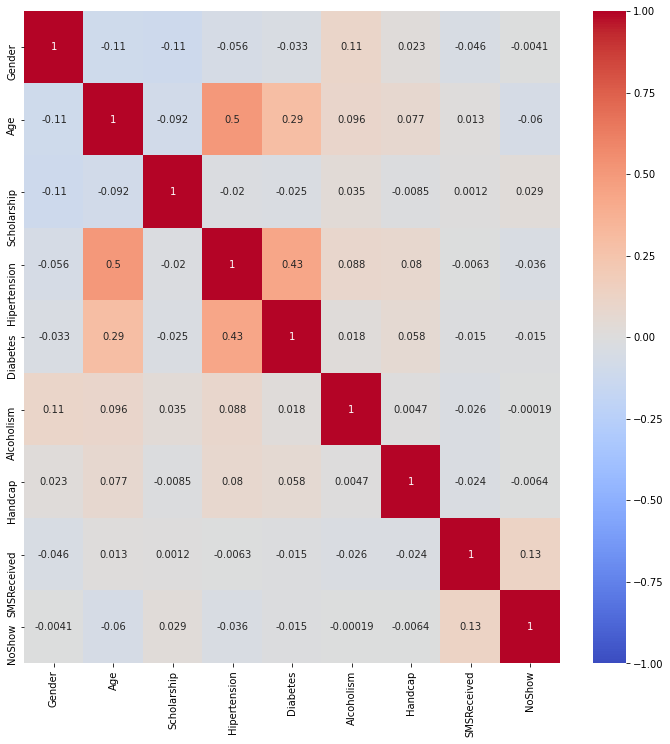

In [61]:
plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

## Research Question 3
## What day of the week are associated to high no show rate


In [62]:
# converting the date time stamp to day of the week
df['dayOfWeek'] = df['AppointmentDay'].dt.day_name()
df.head()

PatientID  AppointmentID Gender  ... NoShow num  dayOfWeek
0  2.987250e+13        5642903      F  ...     No   1     Friday
1  5.589978e+14        5642503      M  ...     No   1     Friday
2  4.262962e+12        5642549      F  ...     No   1     Friday
3  8.679512e+11        5642828      F  ...     No   1     Friday
4  8.841186e+12        5642494      F  ...     No   1     Friday

[5 rows x 16 columns]

In [63]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df1 = df.groupby(['NoShow','dayOfWeek']).count()['AppointmentID']
df1

NoShow  dayOfWeek
No      Friday       14981
        Monday       18023
        Saturday        30
        Thursday     13908
        Tuesday      20487
        Wednesday    20774
Yes     Friday        4037
        Monday        4689
        Saturday         9
        Thursday      3336
        Tuesday       5152
        Wednesday     5093
Name: AppointmentID, dtype: int64

Looking at this it is clear that there are no appointments on a sunday and on saturday there are very few appointsments

In [64]:
df['num']=1
df2 = df.groupby(['dayOfWeek', 'NoShow']).agg({'num': 'sum'})
df2 = df2.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).reset_index()

df2

dayOfWeek NoShow        num
0      Friday     No  78.772742
1      Friday    Yes  21.227258
2      Monday     No  79.354526
3      Monday    Yes  20.645474
4    Saturday     No  76.923077
5    Saturday    Yes  23.076923
6    Thursday     No  80.654141
7    Thursday    Yes  19.345859
8     Tuesday     No  79.905613
9     Tuesday    Yes  20.094387
10  Wednesday     No  80.310821
11  Wednesday    Yes  19.689179

In [65]:
df1 = df2.groupby(['NoShow','dayOfWeek']).min()['num']
df1

NoShow  dayOfWeek
No      Friday       78.772742
        Monday       79.354526
        Saturday     76.923077
        Thursday     80.654141
        Tuesday      79.905613
        Wednesday    80.310821
Yes     Friday       21.227258
        Monday       20.645474
        Saturday     23.076923
        Thursday     19.345859
        Tuesday      20.094387
        Wednesday    19.689179
Name: num, dtype: float64

It is clear that Saturday has the highest no show rate followed by Friday with a percentage of 21.23%  followed by Monday 20.65%

In [66]:
#sorting it the based on calendar 
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
No_percent = df1['No'].reindex(days) 
No_percent

dayOfWeek
Monday       79.354526
Tuesday      79.905613
Wednesday    80.310821
Thursday     80.654141
Friday       78.772742
Saturday     76.923077
Name: num, dtype: float64

In [67]:
Yes_percent = df1['Yes'].reindex(days) 
Yes_percent

dayOfWeek
Monday       20.645474
Tuesday      20.094387
Wednesday    19.689179
Thursday     19.345859
Friday       21.227258
Saturday     23.076923
Name: num, dtype: float64

In [0]:
ind = np.arange(len(Yes_percent))  
width = 0.35 

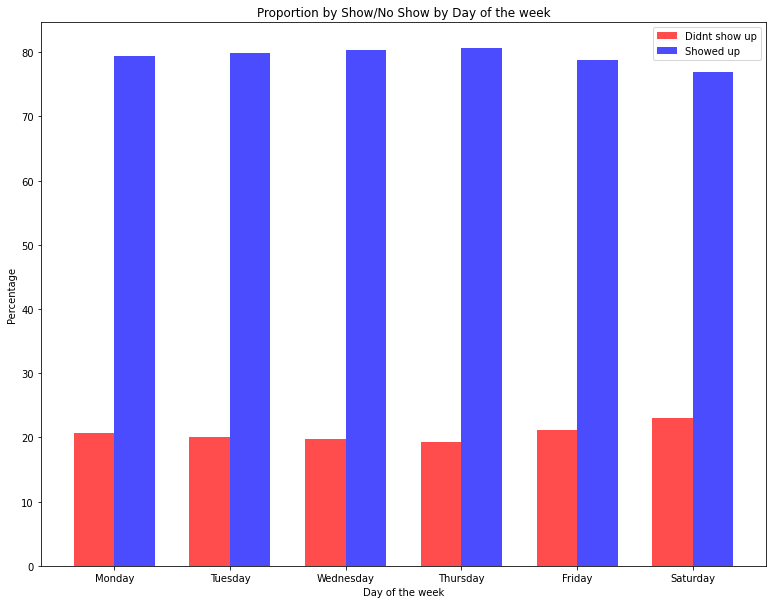

In [69]:
#With the Percentage it is bit clear that Most of the values are below 30 % for no show rate.
# plot bars
plt.figure(figsize=(13,10))
red_bars = plt.bar(ind, Yes_percent, width, color='r', alpha=.7, label='Didnt show up')
blue_bars = plt.bar(ind + width, No_percent, width, color='b', alpha=.7, label='Showed up')

# title and labels

x= plt.ylabel('Percentage')
y= plt.xlabel('Day of the week')
plt.title('Proportion by Show/No Show by Day of the week')
locations = ind + width / 2  # xtick locations
labels =  days # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();


<a id='conclusions'></a>
## Conclusions



1. Over all show rate of people coming to the said appointment is  more than people not showing up. With one exeption of neighbourhood ILHAS OCEÂNICAS DE TRINDADE	 where there was higher no show rate than show rate it was because there was just 1 appointment taking place over a long duration.

2. There is positive Correlation between no show rate and SMS received(0.126 which means somehow people getting messages are not showing up for appointment.

3. There is a high correlation between Age and Hypertension (0.504) and Diabetes and Hypertension (0.433)

4. When we look at day of the week and no show rate it is clear that Sturday, Friday and Monday have highest no show rate.

## Limitation 
1. The data isn't distrubuted according to the neighbourhood properly hence there is issue of 100% no show rate popping up in the analysis.
2. Data for saturday appointments is very limited compared to other days . which makes the results of no show rate for saturday unreliable.